In [1]:
import musdb
import torch
import random
import numpy as np
from museval import metrics
from splitter import Splitter
from util import utility
from pathlib import Path
import IPython.display as ipd
import soundfile

import json
import numpy as np
import matplotlib.pyplot as plt
# /home/ytang363/miniconda3/envs/conda_env/lib/python3.8/site-packages/tensorboard

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_path = "/home/ytang363/7100_spr2023/model/20230325-16_ep-1000_b-16.pt"
model = Splitter(stem_names=["vocals","accompaniment"]) #"accompaniment"
print(model.state_dict().keys())

state_dict = torch.load(model_path)

print(state_dict.keys())
model.load_state_dict(state_dict['model_state_dict'])

mus = musdb.DB(
    root="/home/ytang363/7100_spr2023/musdb18",
    is_wav=False,
    subsets=["test"]
)

odict_keys(['stems.vocals.encoder_layers.0.conv.weight', 'stems.vocals.encoder_layers.0.conv.bias', 'stems.vocals.encoder_layers.0.bn.weight', 'stems.vocals.encoder_layers.0.bn.bias', 'stems.vocals.encoder_layers.0.bn.running_mean', 'stems.vocals.encoder_layers.0.bn.running_var', 'stems.vocals.encoder_layers.0.bn.num_batches_tracked', 'stems.vocals.encoder_layers.1.conv.weight', 'stems.vocals.encoder_layers.1.conv.bias', 'stems.vocals.encoder_layers.1.bn.weight', 'stems.vocals.encoder_layers.1.bn.bias', 'stems.vocals.encoder_layers.1.bn.running_mean', 'stems.vocals.encoder_layers.1.bn.running_var', 'stems.vocals.encoder_layers.1.bn.num_batches_tracked', 'stems.vocals.encoder_layers.2.conv.weight', 'stems.vocals.encoder_layers.2.conv.bias', 'stems.vocals.encoder_layers.2.bn.weight', 'stems.vocals.encoder_layers.2.bn.bias', 'stems.vocals.encoder_layers.2.bn.running_mean', 'stems.vocals.encoder_layers.2.bn.running_var', 'stems.vocals.encoder_layers.2.bn.num_batches_tracked', 'stems.vocals

In [3]:
def save_wav(output_dir, data, name):
    fpath_dst = Path(output_dir) / name
    soundfile.write(fpath_dst, data, 44100, "PCM_16")

In [4]:
## Test Loader ##
# duration = 10
# niter = 1 # max 50
# output_dir = "/home/ytang363/7100_spr2023/audio/output"

# sdr_list = []
# for i in range(niter):
#     track = mus.tracks[2]

#     duration = duration if track.duration > duration else np.floor(track.duration).astype(int)
#     target = np.zeros((1,(duration-1)*44100, 2))
#     est = np.zeros((1,(duration-1)*44100, 2))
    
#     track.chunk_duration = track.duration
#     track.chunk_start = 30 #np.floor(random.uniform(0, track.duration - duration))
#     print("{}: {}".format(i,track))

#     ## Target ##
#     wav_vocal = track.targets['vocals'].audio
#     # save_wav(output_dir, wav_vocal, "target.wav")
#     target[0] = wav_vocal[:(duration-1)*44100]
#     print(wav_vocal.shape)

#     ## Estimated ##
#     wav_ = track.audio.T
#     # wav_2 = track.audio
#     # save_wav(output_dir, wav_2, "mixture.wav")
#     wav = torch.Tensor(wav_).to(device)
#     with torch.no_grad():
#         stems = model.separate(wav)
#         vocal = stems["vocals"]
#         est_vocal = vocal.cpu().detach().numpy().T
#     est[0] = est_vocal[:(duration-1)*44100]

#     if np.all(target == 0) or np.all(est == 0):
#         eps = 1e-8
#         print("either reference or est has all zero array")
#     else:
#         eps = 0

#     (sdr, _, sir, sar, perm) = metrics.bss_eval(target+eps, est+eps, 
#                                                 window=np.inf, bsseval_sources_version=False)
#     sdr = max(sdr, np.array([[0]]))
#     print("SDR: {}".format(sdr))
#     sdr_list.append(sdr)

0: Angels In Amplifiers - I'm Alright
(6588424, 2)


/home/ytang363/7100_spr2023/splitter.py:75: UserWarning: istft will require a complex-valued input tensor in a future PyTorch release. Matching the output from stft with return_complex=True.  (Triggered internally at ../aten/src/ATen/native/SpectralOps.cpp:978.)
  wav = torch.istft(


SDR: [[7.497901]]


In [5]:
## Compare between target and est ##
# original = wav_[:,0:10*44100]
# target_output = target[0].T[:,0:10*44100]
# est_output = est[0].T[:,0:10*44100]
# print(est_output.shape)
# ipd.Audio(est_output, rate=44100)

In [12]:
def loadSDR(path):
    with open(path) as f:
        # Load the JSON data from the file
        data = json.load(f)
    data = np.array(data)
    return data

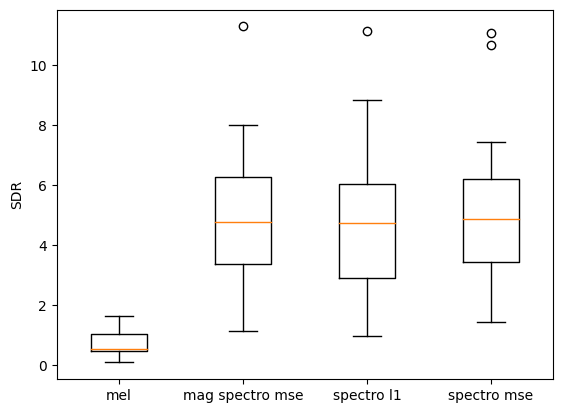

In [15]:
mel = loadSDR("/home/ytang363/7100_spr2023/logs-sdr/mel-loss.json")
spectro_mag = loadSDR("/home/ytang363/7100_spr2023/logs-sdr/spectro_mag-loss.json")
spectro_l1 = loadSDR("/home/ytang363/7100_spr2023/logs-sdr/spectro-loss_l1.json")
spectro = loadSDR("/home/ytang363/7100_spr2023/logs-sdr/spectro-loss.json")
# print(np.mean(spectro))
# print(np.std(spectro))

SDR_list = [mel, spectro_mag, spectro_l1, spectro]
fig, ax = plt.subplots()
ax.boxplot(SDR_list)
ax.set_xticklabels(['mel', 'mag spectro mse', 'spectro l1', 'spectro mse'])
ax.set_ylabel('SDR')

# Show the plot
plt.show()